## Import libraries

In [5]:
import pandas as pd
import io
from os import listdir
from os.path import isfile, join
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

## Set directories

In [6]:
abspath_curr = os.path.join(os.getcwd())
data_path = os.path.join(abspath_curr, 'data')
streaming_data_path = os.path.join(data_path, 'stream', 'enchanted_food_list')

## Read in dataframes and concatenate them

In [7]:
frames = []
data_files = [f for f in listdir(streaming_data_path) if isfile(join(streaming_data_path, f))]
for file in data_files:
    file_path = os.path.join(streaming_data_path, file)
    df = pd.read_csv(file_path, index_col=None, header=0)
    frames.append(df)
df = pd.concat(frames, axis=0, ignore_index=True)
df

C:\JupyterLab\resources\jlab_server\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,created_at,tweet_id,user_id,user_name,screen_name,verified,text,quote_tweet,rewteet_count,favorite_count,place,quote_status_id,entities
0,2021-10-16 22:39:56+00:00,1449505417495674882,1002434346,Anna Mae,AMysticMuse,False,@chxnel_shit honey you can’t even type out ful...,False,0,0,NaN,NaN,NaN
1,2021-10-16 22:39:56+00:00,1449505417491619842,300289849,Simon Sheppard,SeagullSimon,False,I just wrote a little poem to Dad.\n\nAn ode t...,False,0,0,NaN,NaN,NaN
2,2021-10-16 22:39:56+00:00,1449505417688715270,4832818479,Owura,ok_ayanful,False,RT @Chinnyb_: Please if we’ve had sex don’t go...,False,0,0,NaN,NaN,NaN
3,2021-10-16 22:39:56+00:00,1449505417491587075,30597662,tori.,toricantstfu,False,Also very fire 🔥 https://t.co/fdUwGN4qM7,False,0,0,NaN,NaN,NaN
4,2021-10-16 22:39:56+00:00,1449505418191966209,1164673677214081025,🇮🇶 أم فادي59(Műlteçi ) 🇮🇶 ✝,Khloud51031660,False,RT @a_neimi: @MigrationPolicy @ekztarf Please ...,False,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
556066,2021-10-17 12:55:44+00:00,1449720787183800321,246022092,Mickey,MickeyC1888,False,"@MisssPatrice You forgot the food, can’t beat ...",False,0,0,NaN,NaN,NaN
556067,2021-10-17 12:55:44+00:00,1449720787569623041,1083397061796655104,Rico🇾🇪,Brunosprop_,False,@xonlr looks hot in you❤,False,0,0,NaN,NaN,NaN
556068,2021-10-17 12:55:45+00:00,1449720788144119813,1084295226125017088,A........ 🤗,YasarArabath123,False,RT @mathesh00: Pullingo on fire 😉🤞🔥\n\n#Beast ...,False,0,0,NaN,NaN,NaN
556069,2021-10-17 12:55:45+00:00,1449720788026892291,962727702041112576,Ugras Ulku,UgrasUlkuIIF,False,The CBRT cut its policy rate by 100 bps in Sep...,False,0,0,NaN,NaN,NaN


## Clean the data and save

In [20]:
# Remove emojis
df[['user_name', 'screen_name', 'text']] = df[['user_name', 'screen_name', 'text']].astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

# Extract coordinates from place column and add to dataframe
place_series = df.place[pd.isnull(df.place) == False]
def create_coords(x):
    y = x.split('coordinates=[[')[1].split(']])')[0].replace('[', '').replace(']', '').replace(',', '').split()
    return [[float(y[i]), float(y[i+1])] for i in range(0, len(y), 2)]
coords = place_series.apply(lambda x: create_coords(x))
df['coordinates'] = coords

# Add sentiment column
df['sentiment'] = df.text.apply(lambda x: TextBlob(x).sentiment[0])

# Add sentiment pos/neg column
df['pos_neg'] = df.sentiment.apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Create datetimes
df.created_at = pd.to_datetime(df.created_at)

# Write to directory
clean_data_path = os.path.join(streaming_data_path, 'clean')
file_name = os.path.join(clean_data_path, 'clean_streaming_data.csv')
df.to_csv(file_name, encoding='utf-8-sig')
df

,created_at,tweet_id,user_id,user_name,screen_name,verified,text,quote_tweet,rewteet_count,favorite_count,place,quote_status_id,entities,coordinates,sentiment,pos_neg
0,2021-10-16 22:39:56+00:00,1449505417495674882,1002434346,Anna Mae,AMysticMuse,False,@chxnel_shit honey you cant even type out full...,False,0,0,NaN,NaN,NaN,NaN,-0.075000,negative
1,2021-10-16 22:39:56+00:00,1449505417491619842,300289849,Simon Sheppard,SeagullSimon,False,I just wrote a little poem to Dad.\n\nAn ode t...,False,0,0,NaN,NaN,NaN,NaN,-0.187500,negative
2,2021-10-16 22:39:56+00:00,1449505417688715270,4832818479,Owura,ok_ayanful,False,RT @Chinnyb_: Please if weve had sex dont go a...,False,0,0,NaN,NaN,NaN,NaN,0.000000,neutral
3,2021-10-16 22:39:56+00:00,1449505417491587075,30597662,tori.,toricantstfu,False,Also very fire https://t.co/fdUwGN4qM7,False,0,0,NaN,NaN,NaN,NaN,0.200000,positive
4,2021-10-16 22:39:56+00:00,1449505418191966209,1164673677214081025,59(Mltei ),Khloud51031660,False,RT @a_neimi: @MigrationPolicy @ekztarf Please ...,False,0,0,NaN,NaN,NaN,NaN,0.100000,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556066,2021-10-17 12:55:44+00:00,1449720787183800321,246022092,Mickey,MickeyC1888,False,"@MisssPatrice You forgot the food, cant beat t...",False,0,0,NaN,NaN,NaN,NaN,0.000000,neutral
556067,2021-10-17 12:55:44+00:00,1449720787569623041,1083397061796655104,Rico,Brunosprop_,False,@xonlr looks hot in you,False,0,0,NaN,NaN,NaN,NaN,0.250000,positive
556068,2021-10-17 12:55:45+00:00,1449720788144119813,1084295226125017088,A........,YasarArabath123,False,RT @mathesh00: Pullingo on fire \n\n#Beast #Ma...,False,0,0,NaN,NaN,NaN,NaN,0.000000,neutral
556069,2021-10-17 12:55:45+00:00,1449720788026892291,962727702041112576,Ugras Ulku,UgrasUlkuIIF,False,The CBRT cut its policy rate by 100 bps in Sep...,False,0,0,NaN,NaN,NaN,NaN,0.500000,positive


## Create wordcloud

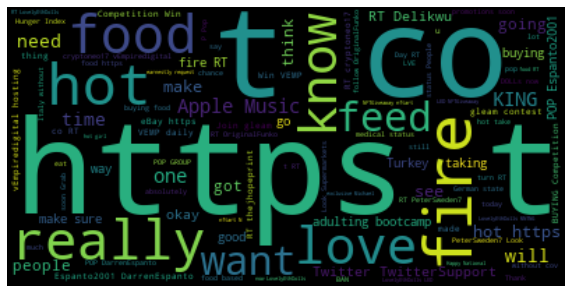

In [14]:
# Get string of all text
text = " ".join(text for text in df.text)

# Generate wordcloud image
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, max_font_size=100, max_words=100, background_color="black", mode="RGBA").generate(text)

# Display wordcloud image
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
image_path = os.path.join(abspath_curr, 'images')
data_files = [f.rsplit('.', 1)[0] for f in listdir(clean_data_path) if isfile(join(clean_data_path, f))]
image_file_path = os.path.join(image_path, data_files[-1] + '_wordcloud.png')
plt.savefig(image_file_path, format="png")
plt.show()

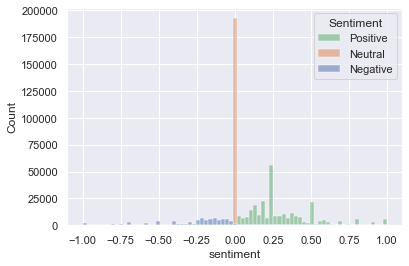

In [40]:
sns.set_theme(style="darkgrid")
sns.histplot(data=df, x="sentiment", bins=75, hue='pos_neg')
plt.legend(title='Sentiment', labels=['Positive', 'Neutral', 'Negative'])
image_file_path = os.path.join(image_path, data_files[-1] +'_sentiment.png')
plt.savefig(image_file_path, format="png")